# Final Project NFL Fantasy Scores

For the final project, I have decided to analyze NFL fantasy projections compared to actual scores of the previous year. I have been playing fantasy football for 5 years now, and have only made it to the championship twice. Ananlyzing fantasy football projections is quickly becoming a valuable skill and various companies are starting to hire for data analysts for their fantasy projections. In fantasy football, players will draft NFL players from the various teams to create their own team and play against others to score more points. As a poplar way to enjoy the NFL season, fantasy football has been gaining momentum in recent years with various apps and services running their own fantasy leagues. 

WHile there are various scoring formats to play fantasy football, the most popular way is by playing Points Per Reception (PPR). In this scoring format, players receive one point per reception, so an empahsis is given for players that are thrown the ball often. A popualr strategy is to draft a Running Back (RB) in the first round. This analysis will focus on the 2019 points that RBs scored compared to their projections for 2020.

For my hypothesis, I predict that the higher a player scores in 2019, their projections will be lower than the points they scored. While it seems counter intutive, players tend to negatively regress from their previous season, while still having higher projections than the previous year. Statistically speaking, players that consistenlty score higher will have higher projections than the previous year, while still being lower than their actual scored points. 

Regression is useful for fantasy players in making educated assumptions on who to draft, but due to the voaltile nature of sports and the NFL inparticular, regresison can only account for so much. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(20.0, 10.0)
df = pd.read_csv('rb_stats_and_projections.csv')

In [2]:
df.shape

(255, 21)

In [4]:
df.head(255)

,Unnamed: 0,PLAYER NAME,TEAM NAME,PLAYER POSITION,2019 CAR,2019 RUSH YDS,2019 RUSH AVG,2019 RUSH TD,2019 REC,2019 REC YDS,...,2019 FPTS,2020 CAR,2020 RUSH YARDS,2020 RUSH AVG,2020 RUSH TD,2020 REC,2020 REC YDS,2020 REC TD,2020 FPTS,Player OUTLOOK
0,1,Christian McCaffrey,Panthers,RB,287.0,1387.0,4.8,15.0,116.0,1005.0,...,471.20,233.0,1048.0,4.5,9.0,90.0,736.0,3.0,333.95,McCaffrey returns as the feature back in Carol...
1,2,Ezekiel Elliott,Cowboys,RB,301.0,1357.0,4.5,12.0,54.0,420.0,...,311.70,282.0,1244.0,4.4,10.0,57.0,455.0,2.0,300.76,Elliott returns as the clear feature back in D...
2,3,Saquon Barkley,Giants,RB,217.0,1003.0,4.6,6.0,52.0,438.0,...,244.10,261.0,1176.0,4.5,10.0,57.0,458.0,3.0,292.33,Barkley's 2019 season fell short of lofty expe...
3,4,Dalvin Cook,Vikings,RB,250.0,1135.0,4.5,13.0,53.0,519.0,...,292.40,245.0,1051.0,4.3,10.0,64.0,536.0,1.0,291.72,Cook's career has thus far been marred by inju...
4,5,Alvin Kamara,Saints,RB,171.0,797.0,4.7,5.0,81.0,533.0,...,248.52,194.0,876.0,4.5,8.0,78.0,600.0,3.0,290.39,Kamara is coming off an up-and-down 2019 campa...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,251,Marshawn Lynch,FA,RB,12.0,34.0,2.8,1.0,0.0,0.0,...,9.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,No outlook available.
251,252,Darren Sproles,Eagles,RB,17.0,66.0,3.9,0.0,6.0,24.0,...,17.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,No outlook available.
252,253,LeSean McCoy,FA,RB,101.0,465.0,4.6,4.0,28.0,181.0,...,118.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,No outlook available.
253,254,Alex Barnes,Titans,RB,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,No outlook available.


While this data set is older, useufl data can still be gained from analyzing 2019 scores and 2020 projections. It should be noted that 2020 projections ended up varying widely due to injury and the COVID-19 pandemic. To being we will start with descriptive stats and then move to linear regression.

In [6]:
df[['2019 FPTS']].mean()

2019 FPTS    72.394588
dtype: float64

In [7]:
df[['2019 FPTS']].median()

2019 FPTS    36.95
dtype: float64

In [8]:
df[['2019 FPTS']].mode()

,2019 FPTS
0,0.0


Despite there being 32 teams in the NFL, only 122 of the 255 RBs actually scored fantasy points in 2019. Due to this the mode was 0. Becuase 0 points in 2019 does not give a clear idea to projections for 2020 in this context, we will manually clean the dataset for any NaN or 0 values for 2019 FPTS. 

In [37]:
df1 = pd.read_csv('clean_rb_stats_and_projections.csv')
df1.shape

(123, 21)

In [39]:
df1.head(123)

,Unnamed: 0,PLAYER NAME,TEAM NAME,PLAYER POSITION,2019 CAR,2019 RUSH YDS,2019 RUSH AVG,2019 RUSH TD,2019 REC,2019 REC YDS,...,2019 FPTS,2020 CAR,2020 RUSH YARDS,2020 RUSH AVG,2020 RUSH TD,2020 REC,2020 REC YDS,2020 REC TD,2020 FPTS,Player OUTLOOK
0,1,Christian McCaffrey,Panthers,RB,287.0,1387.0,4.8,15.0,116.0,1005.0,...,471.20,233.0,1048.0,4.5,9.0,90.0,736.0,3.0,333.95,McCaffrey returns as the feature back in Carol...
1,2,Ezekiel Elliott,Cowboys,RB,301.0,1357.0,4.5,12.0,54.0,420.0,...,311.70,282.0,1244.0,4.4,10.0,57.0,455.0,2.0,300.76,Elliott returns as the clear feature back in D...
2,3,Saquon Barkley,Giants,RB,217.0,1003.0,4.6,6.0,52.0,438.0,...,244.10,261.0,1176.0,4.5,10.0,57.0,458.0,3.0,292.33,Barkley's 2019 season fell short of lofty expe...
3,4,Dalvin Cook,Vikings,RB,250.0,1135.0,4.5,13.0,53.0,519.0,...,292.40,245.0,1051.0,4.3,10.0,64.0,536.0,1.0,291.72,Cook's career has thus far been marred by inju...
4,5,Alvin Kamara,Saints,RB,171.0,797.0,4.7,5.0,81.0,533.0,...,248.52,194.0,876.0,4.5,8.0,78.0,600.0,3.0,290.39,Kamara is coming off an up-and-down 2019 campa...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,145,Devine Ozigbo,Jaguars,RB,8.0,60.0,7.5,0.0,1.0,6.0,...,8.00,4.0,15.0,3.7,0.0,0.0,0.0,0.0,2.86,No outlook available.
119,146,Dwayne Washington,Saints,RB,41.0,141.0,3.4,3.0,15.0,167.0,...,7.60,3.0,14.0,4.0,0.0,0.0,0.0,0.0,2.40,No outlook available.
120,147,Darrel Williams,Chiefs,RB,1.0,10.0,10.0,0.0,2.0,11.0,...,67.80,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.33,No outlook available.
121,148,Tyler Ervin,Packers,RB,NaN,NaN,NaN,NaN,NaN,NaN,...,4.10,2.0,8.0,4.0,0.0,0.0,0.0,0.0,1.59,No outlook available.


Now that the data set has been cleaned and is easier to analyze, we will now find the mean, median, and mode of the dataset.

In [40]:
df1[['2019 FPTS']].mean()

2019 FPTS    93.886667
dtype: float64

In [41]:
df1[['2019 FPTS']].median()

2019 FPTS    67.2
dtype: float64

In [42]:
df1[['2019 FPTS']].mode()

,2019 FPTS
0,0.9
1,1.2
2,49.5
3,68.4
4,75.3
5,82.8


Now that we have the mean, median, and mode, we will find the slope, intercept, and r value

In [57]:
import scipy

from scipy.stats import linregress

slope, intercept, r_value, p_value, std_err = linregress(df1['2019 FPTS'], df1['2020 FPTS'])

In [66]:
slope

0.8660938305304643

In [67]:
intercept

6.097613653694054

In [88]:
r_value

0.8966698212318571

With an r value of nearly 0.9, we can see that actually scored 2019 FPTS and projected 2020 FPTS have a strong association. 

To further illustrate, we will plot a scatter plot and plot line

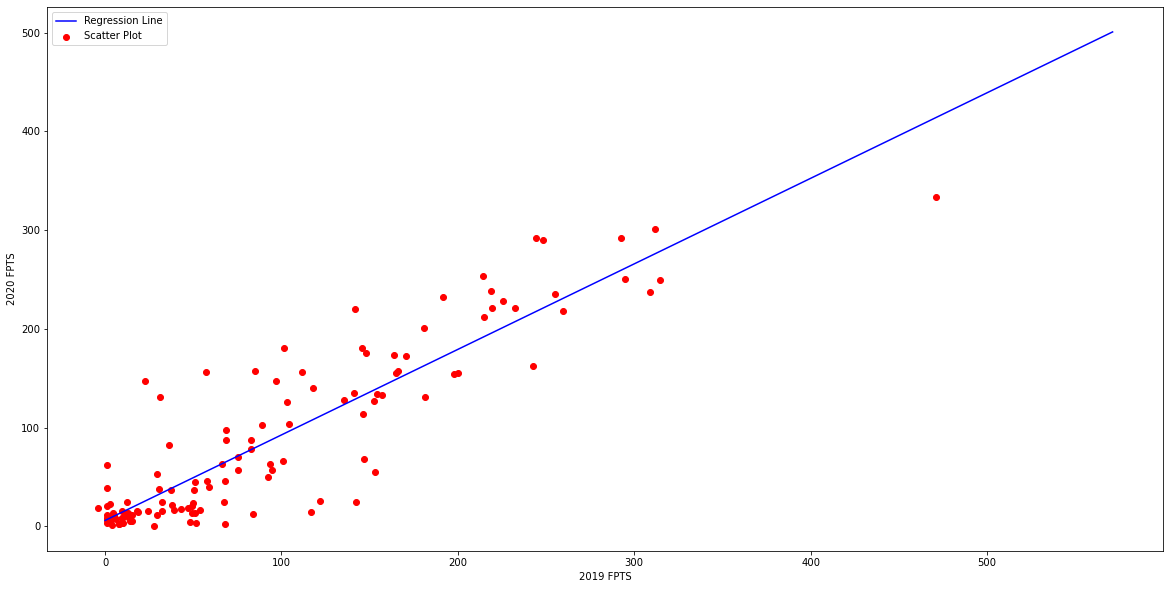

In [87]:
#plot line
X = df1['2019 FPTS'].values
Y = df1['2020 FPTS'].values

plt.plot(x, y, color = 'b', label = 'Regression Line')

#plot scatter points
plt.scatter(X, Y, c = 'r', label = 'Scatter Plot')
plt.xlabel('2019 FPTS')
plt.ylabel('2020 FPTS')
plt.legend()
plt.show()

Now we will find the r squared value

In [91]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#create model
reg = LinearRegression()

#fit training data
reg = reg.fit(X,Y)

#Y prediction
Y_pred = reg.predict(X)

#calculate r2
r2_score = reg.score(X, Y)

print(r2_score)

0.8040167683079698


As we can see here, the r-squared value is slightly over 0.8, meaning that 80% of the variation in projected fantasy points for 2020 can be explained by actual points scored in 2019. 

## Results

As expected, previous year scores were significnatly associated with projected scores for the upcoming year. In this example, 2019 points were able to explain 80% of the variation in projected 2020 points. Furthermore, 2019 points were strongly positively associated with 2020 projected points.

This study was interesting for a personal nature, but also worthwhile, as fanatsy football enjoys widespread popularity and is onyl continuing to grow. While 2019 points were strongly correlated to 2020 projections, this analysis would benefit from deeper analysis by testing different variables, such as 2019 rushing yards, or incorportating a multiple linear regression to perhaps better expalin the effect that 2019 points have on 2020 projections. 

This study only focused on 2019 data and 2020 projections, but a clearer picture could be found by incorporating more data. It is also worthwhile to note, that while these variables were strongly associated, they are not a perfect predictor for actual scores for 2020. NFL players are not static models, and while they can assist in predicting, injury, play schedule, weather, and many other factors can have a significant affect on any given player's fantasy score. 